In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv(r'C:\Users\user\Desktop\birdclef-2022\train_df_clean.csv')

In [3]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_label  635 non-null    object 
 1   type           635 non-null    object 
 2   latitude       635 non-null    float64
 3   longitude      635 non-null    float64
 4   license        635 non-null    object 
 5   rating         635 non-null    float64
 6   filename       635 non-null    object 
 7   path           635 non-null    object 
 8   frames         635 non-null    int64  
 9   sr             635 non-null    int64  
 10  duration       635 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 54.7+ KB
None


# Mel-Spectrogram

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

In [5]:
audio_path = train_df.iloc[0]['path']

from IPython.display import Audio
Audio(audio_path)

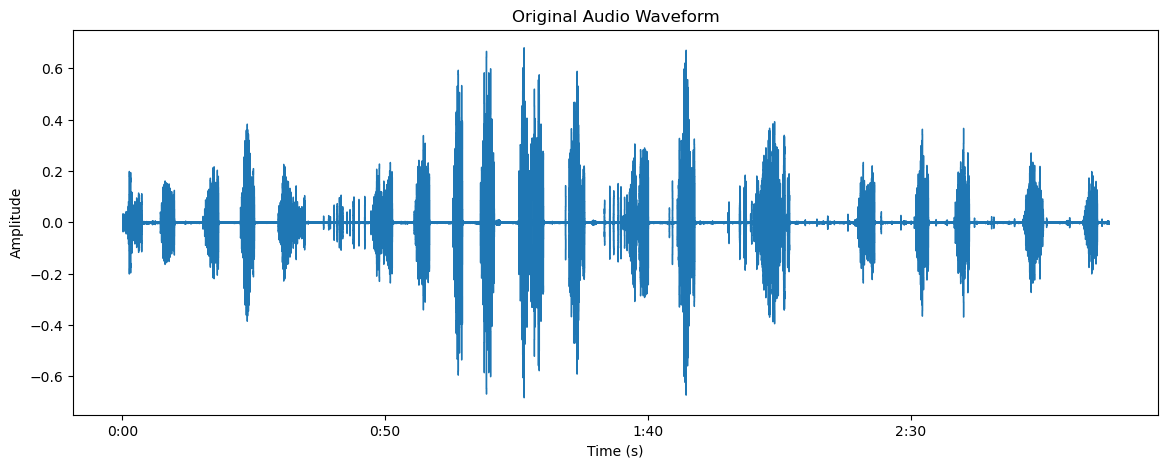

In [6]:
# Load the audio file using Librosa with its original sampling rate
original_audio, sample_rate = librosa.load(audio_path, sr=None)

plt.figure(figsize=(14, 5))

# Display the waveform of the audio file
librosa.display.waveshow(original_audio, sr=sample_rate)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [7]:
def create_spectrogram(audio_path, sr=32000, n_fft=2048, hop_length=512, n_mels=128):
    # Load the audio file with the specified sampling rate
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Generate a Mel-scaled spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    
    # Convert the power spectrogram to decibel units
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Plot the Mel-frequency spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')  # Add a color bar to show the intensity in decibels
    plt.title('Mel-frequency spectrogram')  # Set the title of the plot
    plt.tight_layout()  # Adjusts the plot to fit within the figure area
    plt.show()  # Display the plot
    
    # Return the spectrogram, sampling rate, and hop length
    return S_dB, sr, hop_length

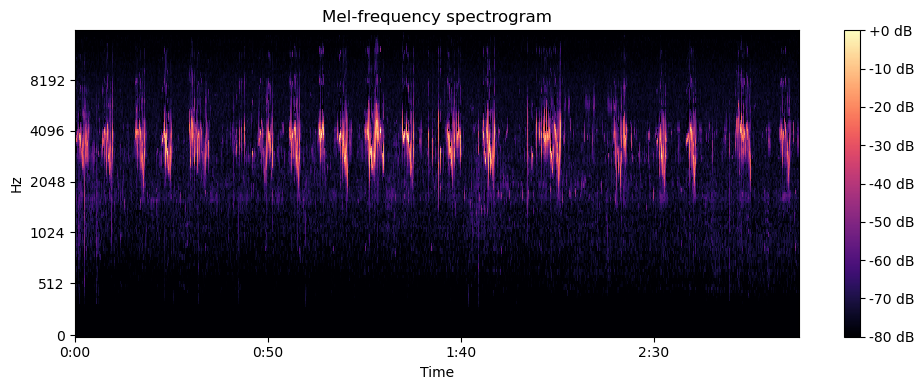

In [8]:
specto = create_spectrogram(audio_path)